
# Linear Regression

#### Problem:
An Ecommerce company based in New York City sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Importing Data

We are using Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [3]:
# Importing Ecommerce Customers.csv file to create 'customers' dataframe
customers = pd.read_csv('Ecommerce Customers.csv')

In [4]:
# Checking the head of customers, and checking out its info() and describe() methods.
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis


**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.

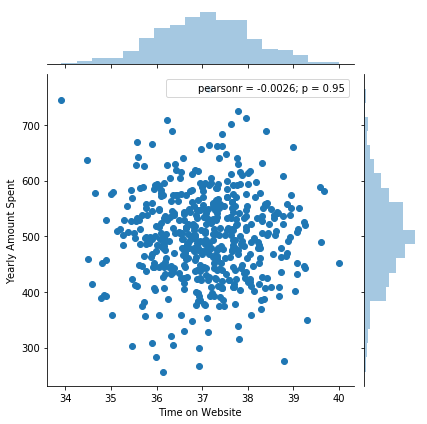

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Plotting the same but with the Time on App column instead. **

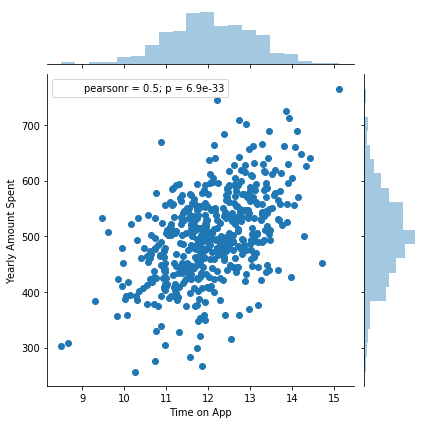

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

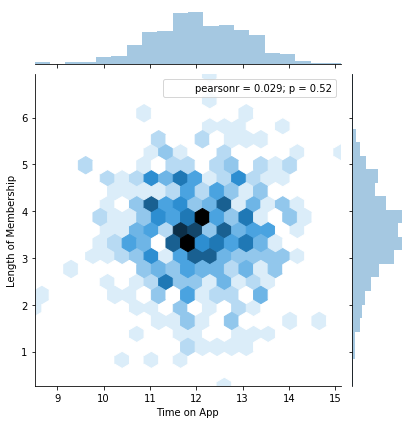

In [10]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

**Exploring types of relationships across the entire data set. Using pairplot to recreate the plot below.**

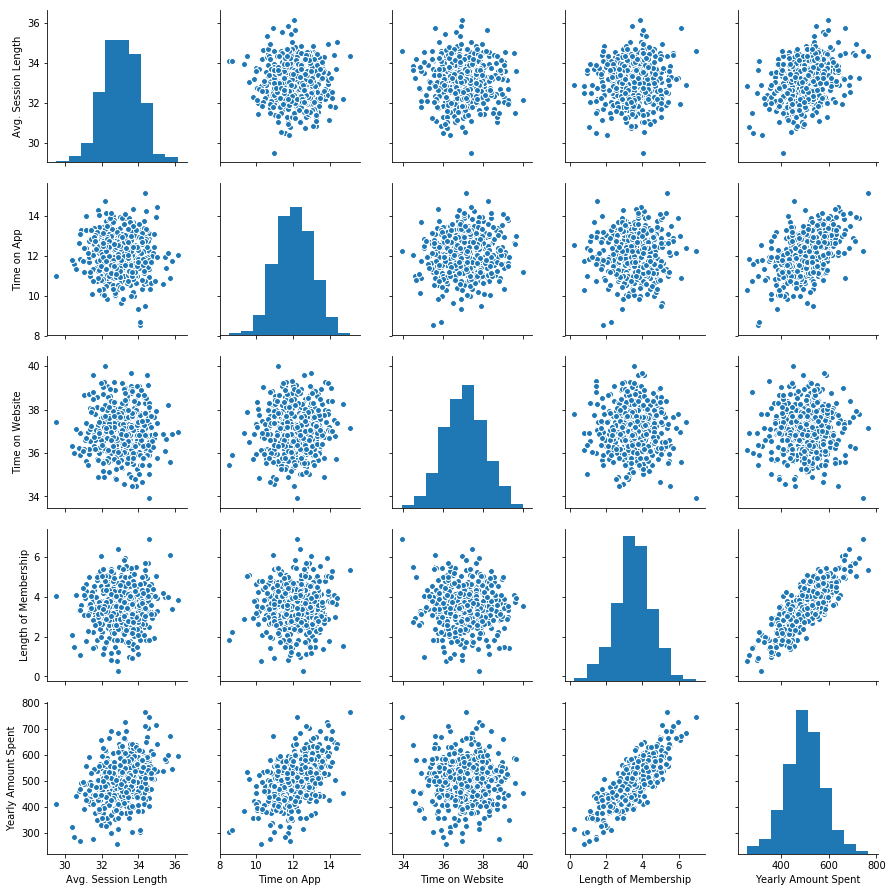

In [11]:
sns.pairplot(customers)

Based off this Length of Membership looks to be the most correlated feature with Yearly Amount Spent

**Creating a linear model plot using seaborn's lmplot of  Yearly Amount Spent vs. Length of Membership. **

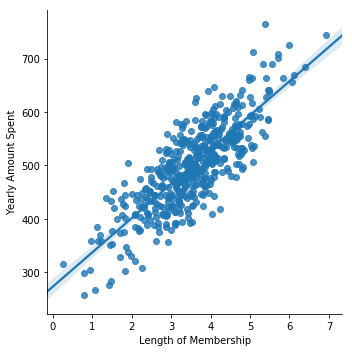

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Spliting the data into training and testing sets

** Setting variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [15]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [22]:
x = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [23]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [18]:
y = customers['Yearly Amount Spent']

In [19]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets with test_size=0.3 and random_state=101**

In [24]:
from sklearn.cross_validation import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Training the Model

** Import LinearRegression from sklearn.linear_model **

In [27]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [28]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [30]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing the coefficients of the model**

In [31]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [34]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Evaluating the performance of the model by predicting off the test values!

** Using lm.predict() to predict off the X_test set of the data.**

In [35]:
predictions = lm.predict(x_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

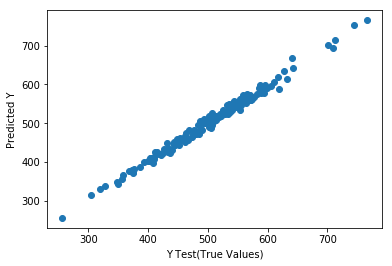

In [40]:
plt.scatter(x=y_test,y=predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Y')

## Evaluating the Model

Evaluating the model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [41]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.228148653430853
MSE:  79.81305165097487
RMSE:  8.933815066978656


In [47]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

## Residuals

Exploring the residuals to check consistency of data. 

**Plotting a histogram of the residuals to make sure it looks normally distributed.**

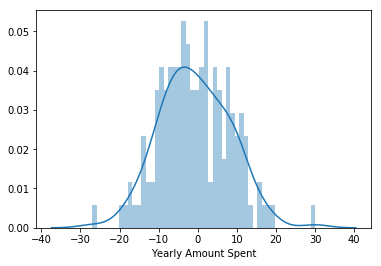

In [51]:
sns.distplot(y_test-predictions,bins=50)

## Conclusion
We still want to figure out whether do we focus our effort on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Interpreting the coefficients at all to get an idea.

** Recreating the dataframe below. **

In [38]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Interpreting the coefficients? **

If we hold all the predictors to be fixed, a 1 unit increase in Avg. Session Length is associated with $25.981550 increase in Yearly Amount Spent.
Same thing goes for other predictors as well.

So, if the company wants to catch up with App, then Website. and if the company wants to further develop already successful App, then app.

## Using statsmodels.api

In [54]:
import statsmodels.api as sm

In [55]:
lm2 = sm.OLS(y_train,x_train).fit()

In [56]:
predictions2 = lm2.predict(x_test)

In [57]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 4.183e+04
Date:                 Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                         15:51:49   Log-Likelihood:                -1592.8
No. Observations:                  350   AIC:                             3194.
Df Residuals:                      346   BIC:                             3209.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.9833      0.952     13.632      0.000      11.110      14.857
Time on App             33.9165      1.276     26.590      0.000      31.408      36.425
Time on Website        -14.8027      0.902    -16.417      0.000     -16.576     -13.029
Length of Membership    59.5847      1.253     47.553      0.000      57.120      62.049
==============================================================================
Omnibus:                        0.095   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.206
Skew:                           0.006   Prob(JB):                        0.902
Kurtosis:                       2.882   Cond. No.                         57.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""